In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv('/content/synthetic_data.csv')
df.shape

(1000, 22)

In [3]:
df.head()

,Customer ID,Age,Gender,Occupation,Location,Policy Type,Policy Start Date,Premium Amount,Claim ID,Claim Date,...,Payment Amount,App Login,Page Views,Feature Usage,Drop-off Points,Conversion Rates,Experience Rating,Ease Rating,Responsiveness Rating,Accuracy Rating
0,1,60,Male,Employed,Nakuru,Property Insurance,2021-01-01,7553.980300,1,2022-01-01,...,9802.936231,38,247,20,2,0.673568,3,3,1,5
1,2,23,Male,Self Employed,Kisumu,Health Insurance,2021-01-02,5917.362383,2,2022-01-02,...,4778.563230,75,174,36,2,0.616815,3,1,1,4
2,3,49,Male,Student,Nakuru,Property Insurance,2021-01-03,4208.610496,3,2022-01-03,...,3912.750137,5,35,45,3,0.620734,1,5,5,4
3,4,34,Female,Employed,Nyeri,Property Insurance,2021-01-04,6882.167222,4,2022-01-04,...,9057.542852,22,197,7,1,0.846540,4,4,5,5
4,5,26,Male,Employed,Nakuru,Life Insurance,2021-01-05,7655.791874,5,2022-01-05,...,5626.282864,72,173,3,0,0.951710,4,1,1,1


In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Occupation', 'Location', 'Policy Type',
       'Policy Start Date', 'Premium Amount', 'Claim ID', 'Claim Date',
       'Claim Amount', 'Payment Date', 'Payment Amount', 'App Login',
       'Page Views', 'Feature Usage', 'Drop-off Points', 'Conversion Rates',
       'Experience Rating', 'Ease Rating', 'Responsiveness Rating',
       'Accuracy Rating'],
      dtype='object')

### 1. Demographic characteristics of policyholders with higher insurance uptake

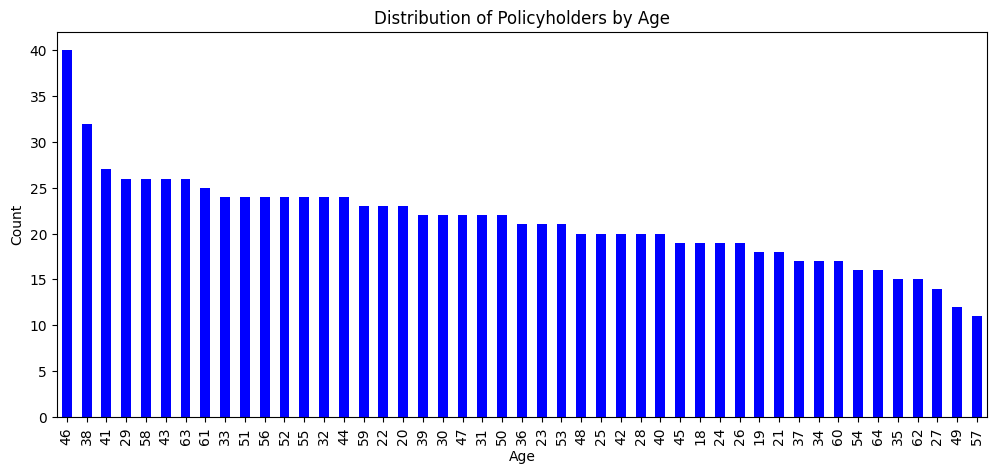

In [5]:
# a. age distribution
age_counts = df['Age'].value_counts()


# Generate charts
plt.figure(figsize=(12, 5))
age_counts.plot(kind='bar', color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Policyholders by Age')
plt.show()

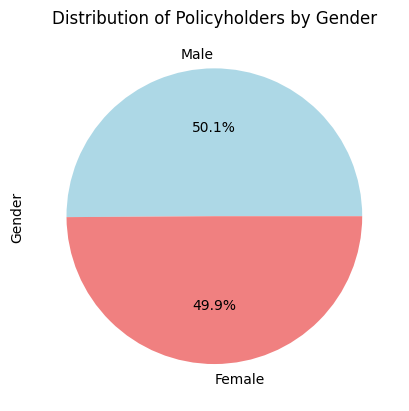

In [6]:
# b. Gender distribution
gender_counts = df['Gender'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Policyholders by Gender')
plt.show()


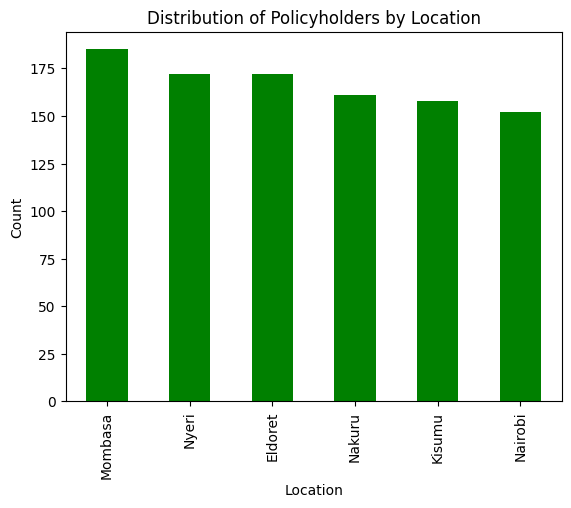

In [7]:
# c.Location
location_counts = df['Location'].value_counts()

location_counts.plot(kind='bar', color='green')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Policyholders by Location')

plt.show()

### 2. Impact of policy type and premium amounts on uptake and growth

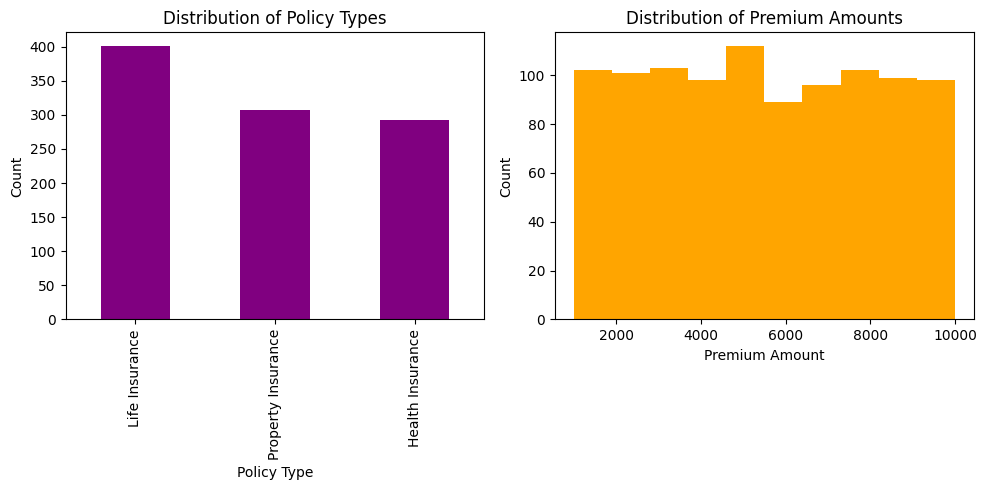

In [8]:
#
policy_type_counts = df['Policy Type'].value_counts()
premium_amounts = df['Premium Amount']

# Generate charts
plt.figure(figsize=(10, 5))
plt.subplot(121)
policy_type_counts.plot(kind='bar', color='purple')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.title('Distribution of Policy Types')

plt.subplot(122)
plt.hist(premium_amounts, bins=10, color='orange')
plt.xlabel('Premium Amount')
plt.ylabel('Count')
plt.title('Distribution of Premium Amounts')

plt.tight_layout()
plt.show()

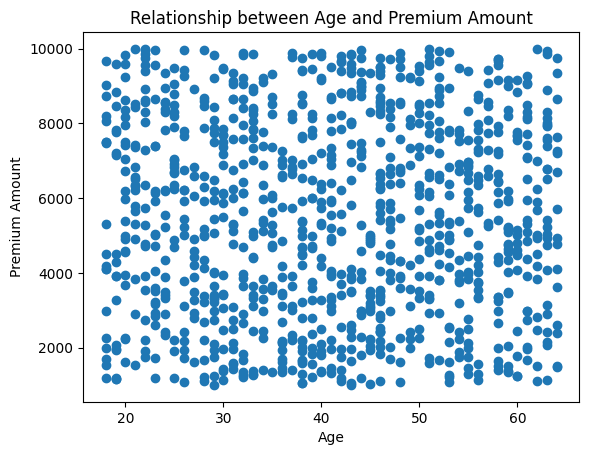

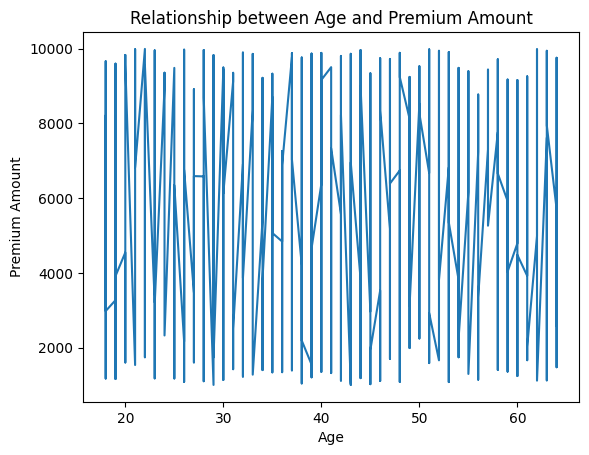

In [9]:
# Scatter Plot: Age vs. Premium Amount
plt.scatter(df['Age'], df['Premium Amount'])
plt.xlabel('Age')
plt.ylabel('Premium Amount')
plt.title('Relationship between Age and Premium Amount')
plt.show()

# Line Plot: Age vs. Premium Amount
sorted_data = df.sort_values('Age')
plt.plot(sorted_data['Age'], sorted_data['Premium Amount'])
plt.xlabel('Age')
plt.ylabel('Premium Amount')
plt.title('Relationship between Age and Premium Amount')
plt.show()

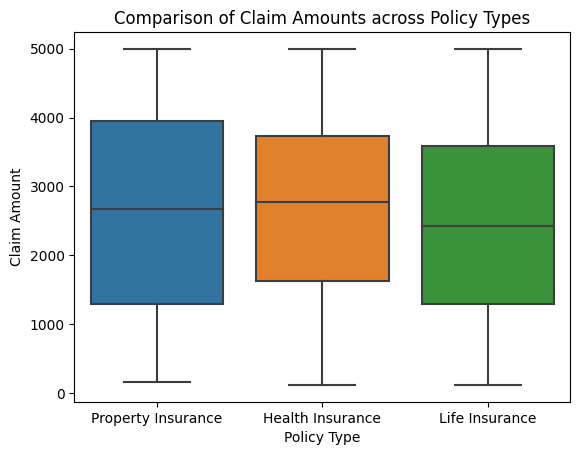

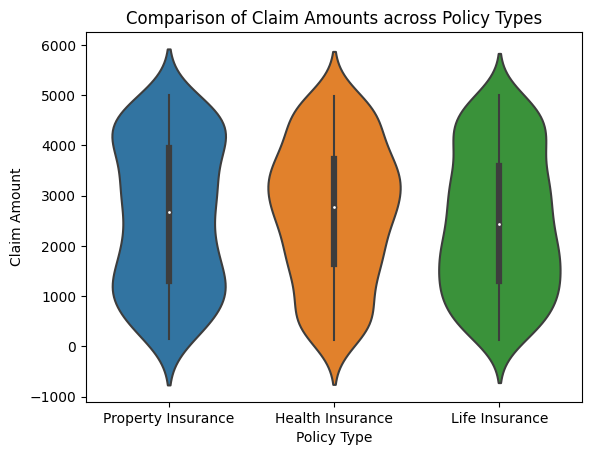

In [10]:
# Box Plot: Policy Type vs. Claim Amount
sns.boxplot(data=df, x='Policy Type', y='Claim Amount')
plt.xlabel('Policy Type')
plt.ylabel('Claim Amount')
plt.title('Comparison of Claim Amounts across Policy Types')
plt.show()

# Violin Plot: Policy Type vs. Claim Amount
sns.violinplot(data=df, x='Policy Type', y='Claim Amount')
plt.xlabel('Policy Type')
plt.ylabel('Claim Amount')
plt.title('Comparison of Claim Amounts across Policy Types')
plt.show()

In [12]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Occupation', 'Location', 'Policy Type',
       'Policy Start Date', 'Premium Amount', 'Claim ID', 'Claim Date',
       'Claim Amount', 'Payment Date', 'Payment Amount', 'App Login',
       'Page Views', 'Feature Usage', 'Drop-off Points', 'Conversion Rates',
       'Experience Rating', 'Ease Rating', 'Responsiveness Rating',
       'Accuracy Rating'],
      dtype='object')

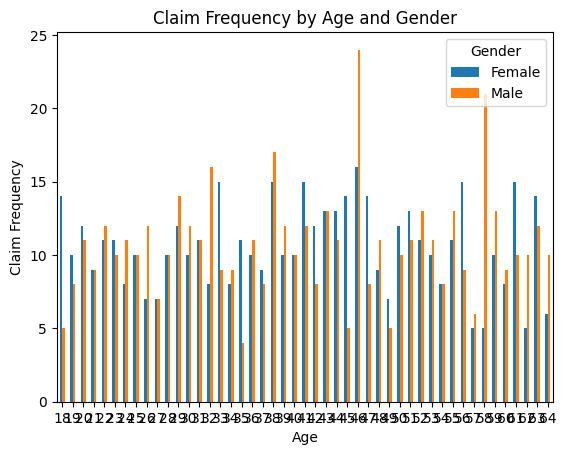

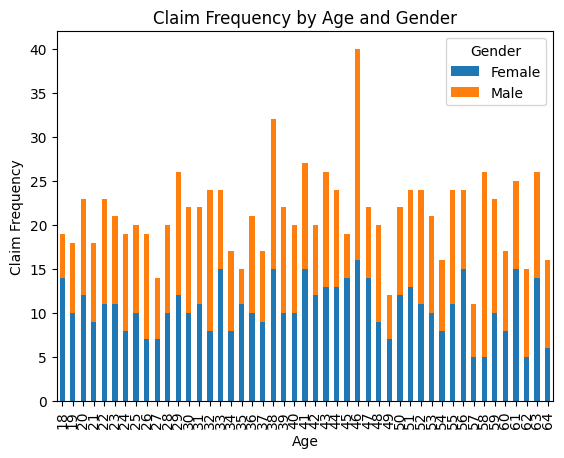

In [15]:
# Grouped Bar Plot: Age, Gender, and Claim Frequency
grouped_data = df.groupby(['Age', 'Gender'])['Claim ID'].count().unstack()
grouped_data.plot(kind='bar', stacked=False)

plt.xlabel('Age')
plt.ylabel('Claim Frequency')
plt.title('Claim Frequency by Age and Gender')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Stacked Bar Plot: Age, Gender, and Claim Frequency
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Claim Frequency')
plt.title('Claim Frequency by Age and Gender')
plt.legend(title='Gender')
plt.show()

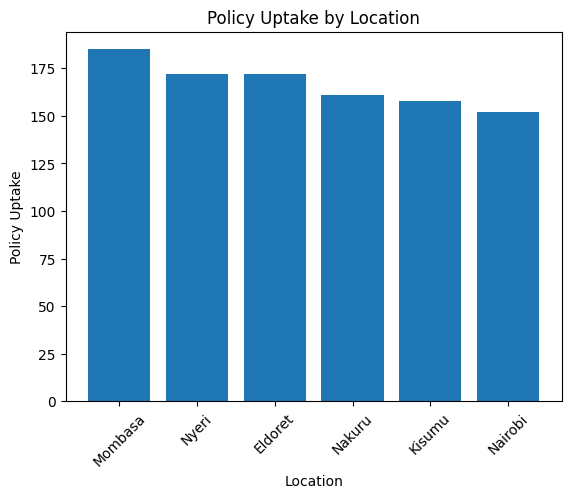

In [19]:
# Bar Plot: Location and Policy Uptake
location_counts = df['Location'].value_counts()
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Location')
plt.ylabel('Policy Uptake')
plt.title('Policy Uptake by Location')
plt.xticks(rotation=45)
plt.show()


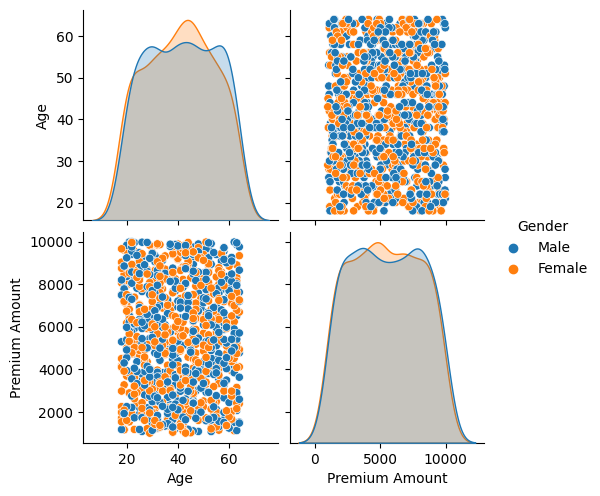

In [42]:
# Scatter Plot Matrix: Age, Gender, and Premium Amount
sns.pairplot(df, vars=['Age', 'Premium Amount'], hue='Gender')
plt.show()

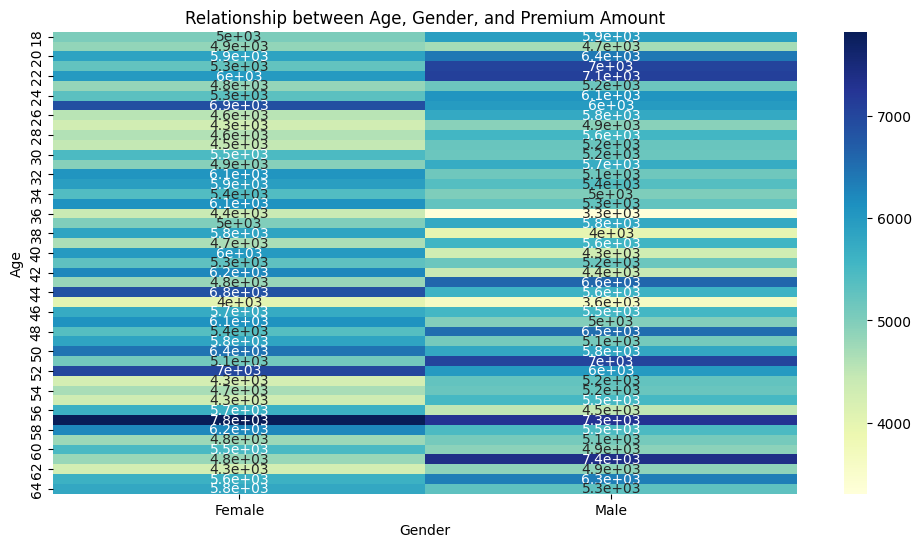

In [44]:
# Heatmap: Age, Gender, and Premium Amount
pivot_table = df.pivot_table(values='Premium Amount', index='Age', columns='Gender', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Relationship between Age, Gender, and Premium Amount')
plt.show()

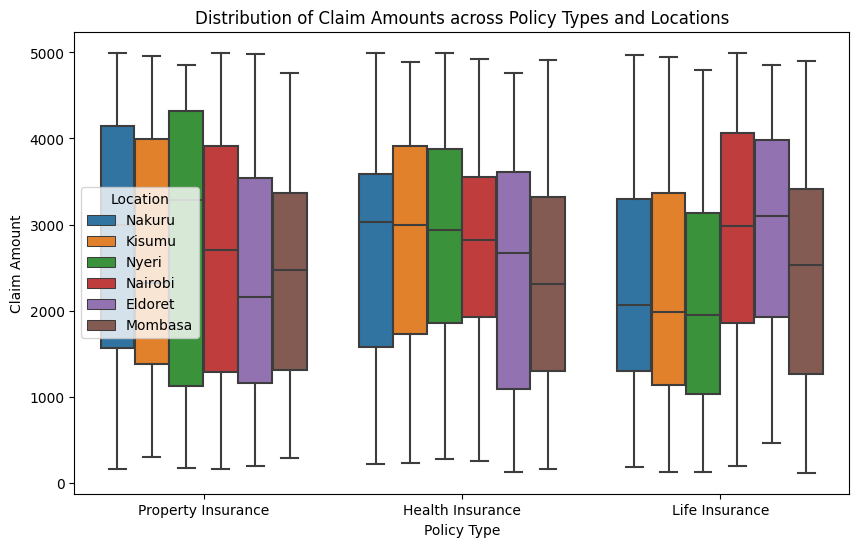

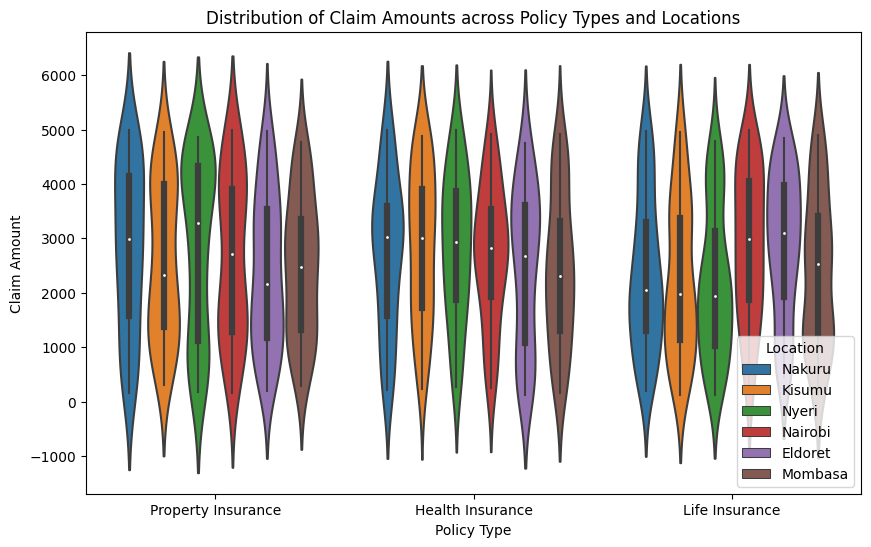

In [22]:
# Grouped Box Plot: Policy Type, Claim Amount, and Location
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Policy Type', y='Claim Amount', hue='Location')
plt.xlabel('Policy Type')
plt.ylabel('Claim Amount')
plt.title('Distribution of Claim Amounts across Policy Types and Locations')
plt.legend(title='Location')
plt.show()

# Violin Plot: Policy Type, Claim Amount, and Location

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Policy Type', y='Claim Amount', hue='Location')
plt.xlabel('Policy Type')
plt.ylabel('Claim Amount')
plt.title('Distribution of Claim Amounts across Policy Types and Locations')
plt.legend(title='Location')
plt.show()

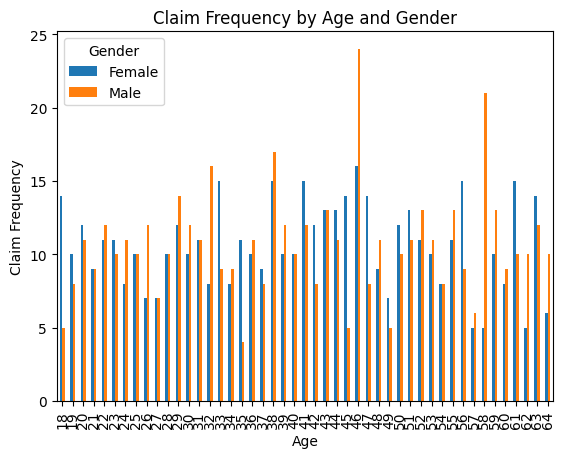

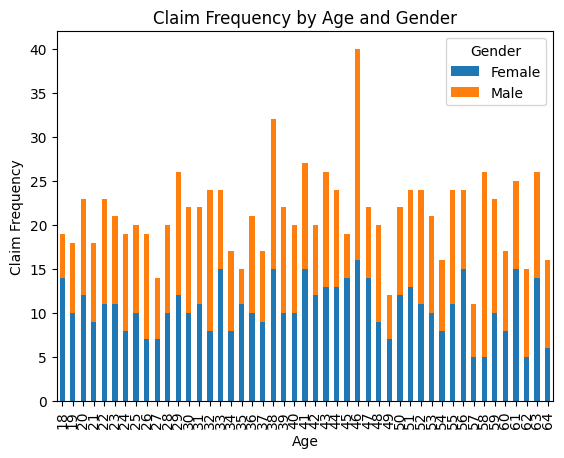

In [23]:
# Grouped Bar Plot: Age, Gender, and Claim Frequency
age_gender_counts = df.groupby(['Age', 'Gender']).size().unstack()
age_gender_counts.plot(kind='bar', stacked=False)
plt.xlabel('Age')
plt.ylabel('Claim Frequency')
plt.title('Claim Frequency by Age and Gender')
plt.legend(title='Gender')
plt.show()

# Stacked Bar Plot: Age, Gender, and Claim Frequency
age_gender_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Claim Frequency')
plt.title('Claim Frequency by Age and Gender')
plt.legend(title='Gender')
plt.show()

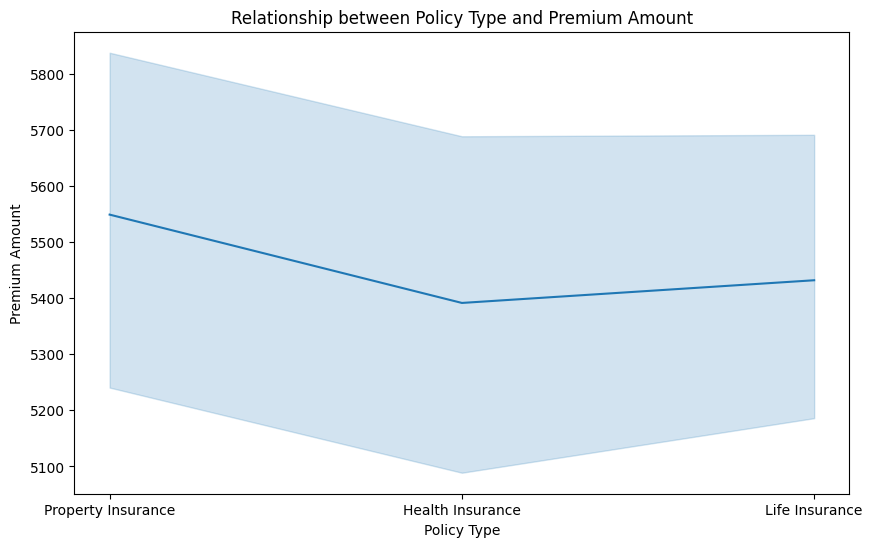

In [26]:
# Line Plot: Policy Type, Premium Amount
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Policy Type', y='Premium Amount')
plt.xlabel('Policy Type')
plt.ylabel('Premium Amount')
plt.title('Relationship between Policy Type and Premium Amount')
plt.show()

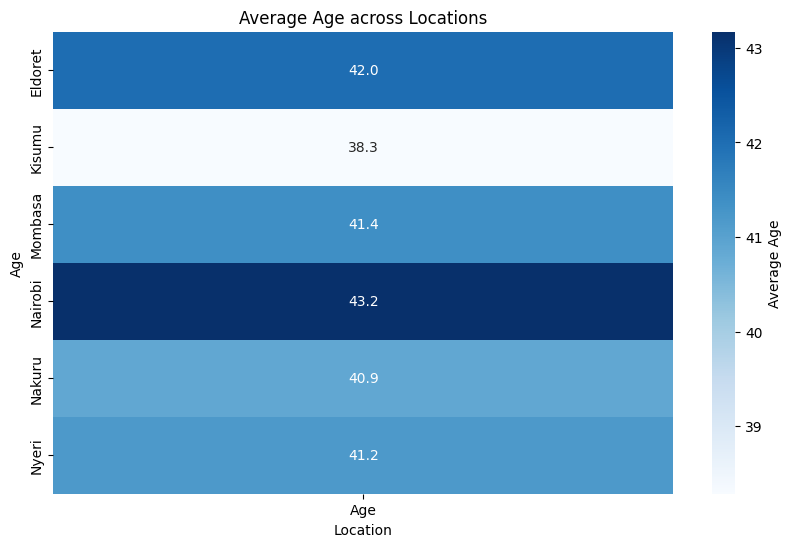

In [29]:
# Heatmap: Age, Location
age_location = df.pivot_table(values='Age', index='Location', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(data=age_location, cmap='Blues', annot=True, fmt=".1f", cbar_kws={'label': 'Average Age'})
plt.xlabel('Location')
plt.ylabel('Age')
plt.title('Average Age across Locations')
plt.show()

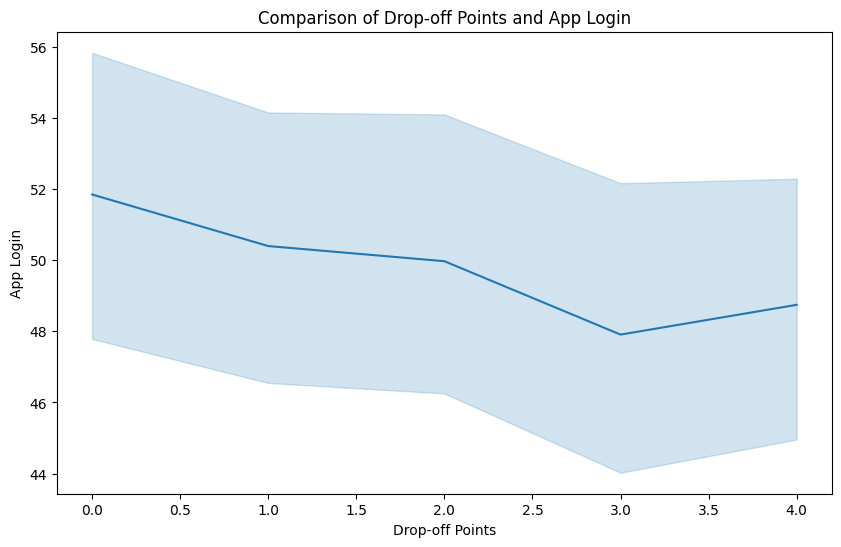

In [39]:
# Scatter Plot: Drop-off Points vs App Login
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Drop-off Points', y='App Login')
plt.xlabel('Drop-off Points')
plt.ylabel('App Login')
plt.title('Comparison of Drop-off Points and App Login')
plt.show()

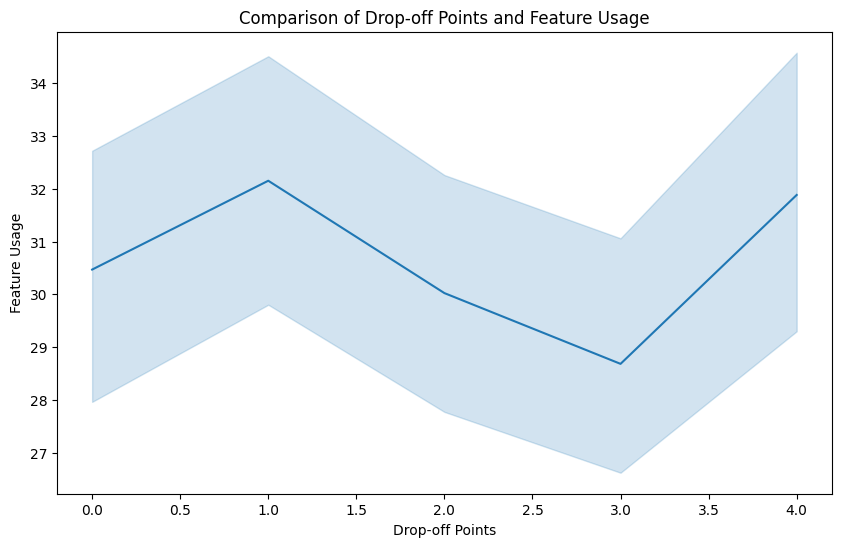

In [40]:
# Scatter Plot: Drop-off Points vs Feature Usage
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Drop-off Points', y='Feature Usage')
plt.xlabel('Drop-off Points')
plt.ylabel('Feature Usage')
plt.title('Comparison of Drop-off Points and Feature Usage')
plt.show()

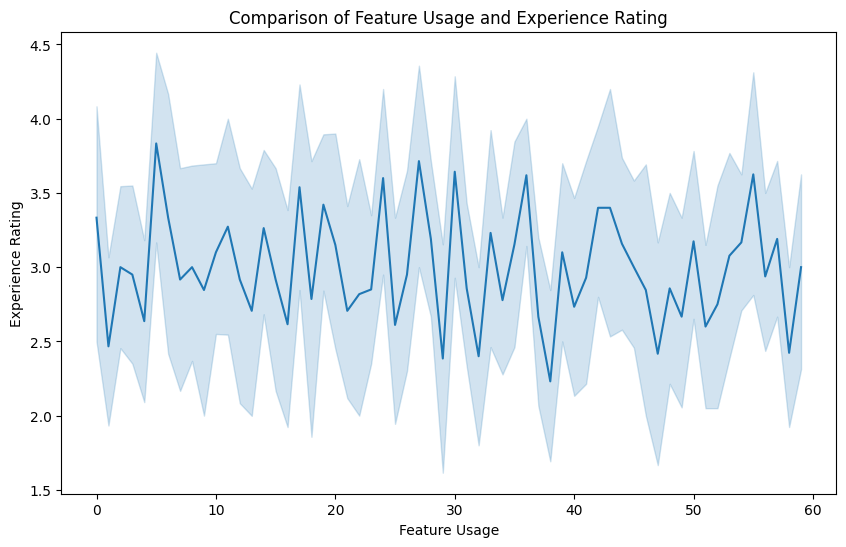

In [36]:
# Scatter Plot: Feature Usage vs Experience Rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Feature Usage', y='Experience Rating')
plt.xlabel('Feature Usage')
plt.ylabel('Experience Rating')
plt.title('Comparison of Feature Usage and Experience Rating')
plt.show()

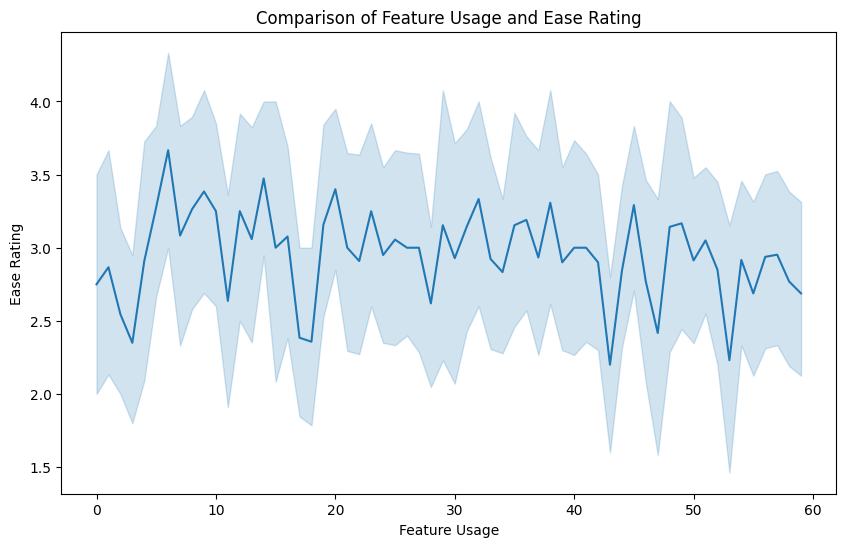

In [35]:
# Scatter Plot: Feature Usage vs Ease Rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Feature Usage', y='Ease Rating')
plt.xlabel('Feature Usage')
plt.ylabel('Ease Rating')
plt.title('Comparison of Feature Usage and Ease Rating')
plt.show()


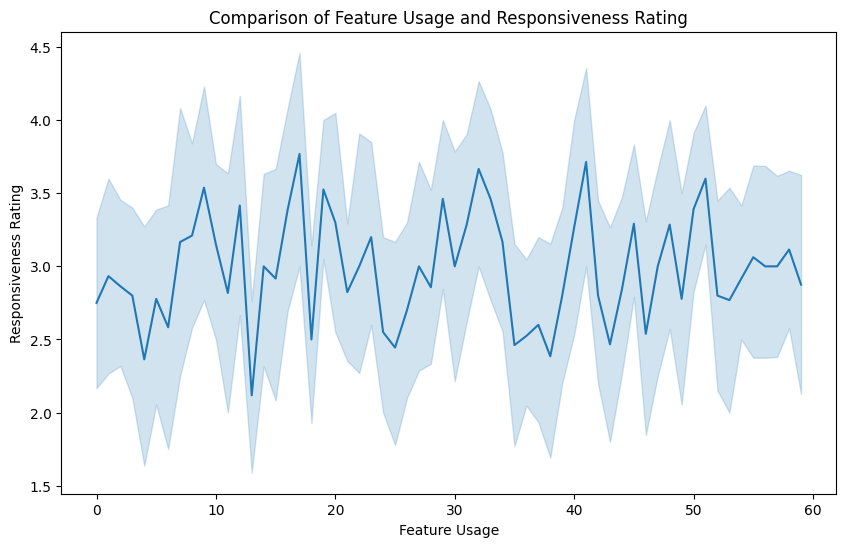

In [34]:
# Scatter Plot: Feature Usage vs Responsiveness Rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Feature Usage', y='Accuracy Rating')
plt.xlabel('Feature Usage')
plt.ylabel('Responsiveness Rating')
plt.title('Comparison of Feature Usage and Responsiveness Rating')
plt.show()

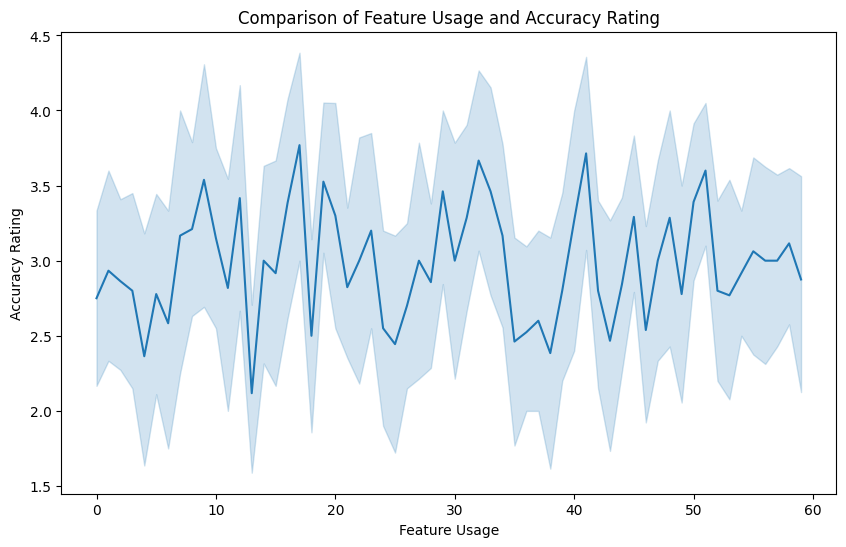

In [41]:
# Scatter Plot: Feature Usage vs Accuracy Rating
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Feature Usage', y='Accuracy Rating')
plt.xlabel('Feature Usage')
plt.ylabel('Accuracy Rating')
plt.title('Comparison of Feature Usage and Accuracy Rating')
plt.show()